# Visualization of Baseball data

In [65]:
%matplotlib inline 
# Magic function in jupyter notebook to display all graph in same book or inline to our code

# Below we are importing required packages or libraries in python

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_rows = 10 # set environt to display rows of any datafram upto 10 only unlike rows of whole data

In [66]:
tables = pd.read_html("https://www.baseball-reference.com/teams/BOS/2016-schedule-scores.shtml#team_schedule::none") # reading html page
games = tables[0] # storing data from table variable to new variable games as table has other details as well like table and data structure information
games.head() # seeing first 5 rows of our data

,Gm#,Date,Unnamed: 2,Tm,,Opp,W/L,R,RA,Inn,W-L,Rank,GB,Win,Loss,Save,Time,D/N,Attendance,Streak
0,1,"Tuesday, Apr 5",boxscore,BOS,@,CLE,W,6,2,NaN,1-0,1,Tied,Price,Kluber,NaN,3:13,D,34493,+
1,2,"Wednesday, Apr 6",boxscore,BOS,@,CLE,L,6,7,NaN,1-1,2,1.0,McAllister,Tazawa,Allen,3:29,N,10298,-
2,3,"Friday, Apr 8",boxscore,BOS,@,TOR,W,8,7,NaN,2-1,2,1.5,Barnes,Storen,Kimbrel,3:24,N,48871,+
3,4,"Saturday, Apr 9",boxscore,BOS,@,TOR,W,8,4,NaN,3-1,2,1.0,Porcello,Dickey,NaN,2:48,D,47138,++
4,5,"Sunday, Apr 10",boxscore,BOS,@,TOR,L,0,3,NaN,3-2,2,2.0,Estrada,Wright,Osuna,2:27,D,46158,-


In [67]:
# Here we are making a dictionary to change the column names so we can have properly named columns
column_names = {'Gm#': 'gameNumber','Date': 'date',
                'Unnamed: 2': 'box', 'Tm': 'home_team', 
                ' ': 'home_away', 'Opp': 'opponent_team',
                'W/L': 'Win_Loss', 'R': 'runscored',
               'RA':'runAllowed','Inn':'innings','W-L':'winlossRecord','Rank':'rank','GB':'gb',
               'Win':'win','Loss':'loss','Save':'save','Time':'time','D/N':'day_night',
                'Attendance':'attendance','Streak':'streak'}
games = (games.rename(columns=column_names))

In [68]:
# Replacing @ with away
mask = games['home_away'] == '@'
column_name = 'home_away'
games.loc[mask, column_name] = 'away'

In [69]:
# updating value which are not equal to 'away' with 'home'
mask = games['home_away'] != 'away'
column_name = 'home_away'
games.loc[mask, column_name] = 'home'

In [70]:
# We have two date value where we have extra value associated with date hence correcting those values
mask = games['date'].str[-3] == '('
column_name = 'date'
games.loc[mask, column_name] = games.loc[mask, column_name].str[:-4]

In [71]:
# Adding 2016 into dates as otherwise date is displaying year as 1900
games.loc[ :,'date'] = games.loc[ :,'date']+str(', 2016')

In [72]:
# removing extra rows which are nothing but repeated column headers
games = games.drop(games[games.gameNumber =='Gm#'].index)

In [73]:
# Chaning date format
games = games.assign(date=lambda x: pd.to_datetime(x['date'], format='%A, %b %d, %Y'))


In [74]:
# creating new data variable for same data
games1 = games

### Scatterplot
Seaborn doesn't have a dedicated scatter plot function hence we will be using lmplot() function however we will turn fit_reg flag to False to make it scatter plot

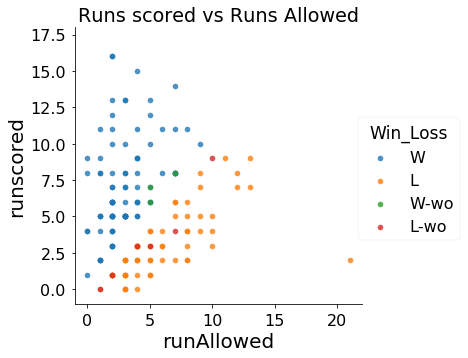

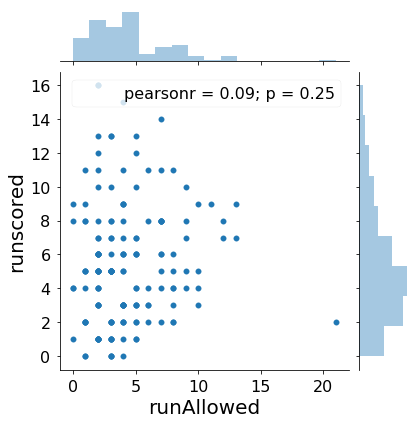

In [75]:
# Scatterplot
   
sns.lmplot(x='runAllowed', y='runscored', data=games1,
           fit_reg=False, # No regression line
           hue='Win_Loss')   # Color by win-loss
# Tweaking our plot a bit using Matplotlib functionality
plt.title("Runs scored vs Runs Allowed")
plt.ylim(-1, 18)
plt.xlim(-1, 22)

#####
# Joint Distribution Plot
sns.jointplot(x=games1["runAllowed"].astype('int'), y=games1["runscored"].astype('int'), data=games1)
# Show plot

plt.show()

### Box Plot
Boxplot gives us the information about the quantile ditribution

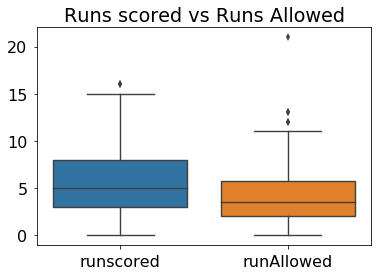

In [76]:
# Boxplot
sns.boxplot(data=games1[['runscored','runAllowed']])
plt.title("Runs scored vs Runs Allowed") # Entering main title
# Show plot
plt.show()

### Factor Plot
Factor plots make it easy to distribution by categorical classes.

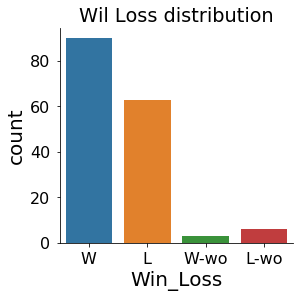

In [77]:
# Factor Plot
sns.factorplot('Win_Loss', data=games1, kind="count")
plt.title("Wil Loss distribution")
# Show plot
plt.show()

### Violine Plot
Violin plots are useful alternatives to box plots.They show the distribution (through the thickness of the violin) instead of only the summary statistics.

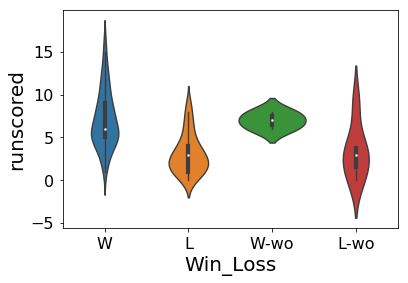

In [78]:
# Violine Plot
sns.violinplot(y=games1["runscored"].astype('int'), x=games1["Win_Loss"], data=games1)
# Show plot
plt.show()

### Swarm Plot
Swarm plots show each point "stacking" them with similar values.

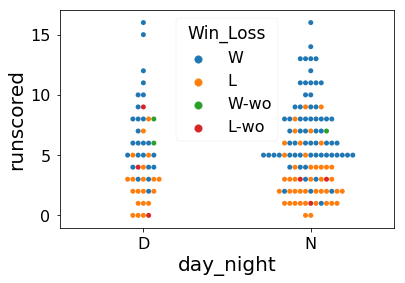

In [79]:
# Swarm Plot
sns.set_context("paper", font_scale=2, rc={"font.size":5,"axes.labelsize":20}) # Formating the appearance of the plot
sns.swarmplot(x="day_night", y=games1["runscored"].astype('int'), data=games1, hue = 'Win_Loss')

# Show plot
plt.show()

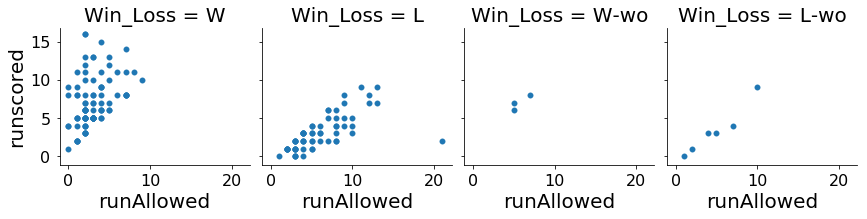

In [80]:
# Multiple scatter plots
g = sns.FacetGrid(games1, col="Win_Loss") 
g.map(plt.scatter, "runAllowed", "runscored")
plt.show()